<a href="https://colab.research.google.com/github/Elisf2024/Adult-income-analysis-MVP/blob/main/MVP_An%C3%A1lise_de_Dados_e_boas_pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição



In [19]:
# ---
# Title: MVP para Análise de Dados
# Author: Elisangela
# Descrição: Este notebook faz a análise exploratória e o pré-processamento de dados de um dataset no UCI Repository chamado: Adult Income Dataset.
# Restrições ou Condições para Seleção dos Dados: O dataset foi escolhido devido ao seu fácil acesso, popularidade para problemas de classificação, e boa quantidade de atributos relevantes para análise socioeconômica.

## 1. Definição do Problema: O objetivo deste projeto é prever se um indivíduo possui renda superior a $50.000 anuais com base em informações demográficas e de trabalho.

## 2. Tipo de Aprendizado: Este é um problema de aprendizado supervisionado de classificação, pois estamos prevendo uma variável categórica (renda > ou <= $50.000).

## 3. Premissas: Fatores como nível educacional, tipo de trabalho, idade e estado civil têm influência sobre a renda de uma pessoa.

# 2. Carregamento do Dataset

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [18]:
# URL do dataset Adult Income - UCI Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [17]:
# Definindo os nomes das colunas
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

In [23]:
# Visualizando as primeiras linhas do dataset
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
# Carregando o dataset
adult_data = pd.read_csv(url, names=columns, sep=',\s', na_values=["?"], engine='python')

**Descrição dos Atributos:**
**age**: Idade do indivíduo.
**workclass**: Classe de trabalho (ex.: assalariado, autônomo, sem trabalho).
**fnlwgt**: Peso final utilizado para estimativas populacionais. Representa quantas pessoas na população têm a mesma combinação de características.
**education**: Nível educacional do indivíduo (ex.: Ensino Médio, Bacharelado).
**education-num:** Número de anos de educação.
**marital-status:** Estado civil do indivíduo (ex.: solteiro, casado, divorciado).
**occupation:** Tipo de ocupação (ex.: administrativo, técnico, serviços).
**relationship:** Relação dentro da família (ex.: cônjuge, filho, parente).
**race:** Raça/etnia do indivíduo (ex.: branco, preto, asiático).
**sex:** Gênero do indivíduo (masculino ou feminino).
**capital-gain:** Ganho de capital (ex.: lucros obtidos em investimentos).
**capital-loss:** Perda de capital (ex.: perdas em investimentos).
**hours-per-week:** Horas trabalhadas por semana.
**native-country:** País de origem do indivíduo.
**income:** Renda do indivíduo, categorizada como >$50.000 ou <=$50.000.

## 3. Análise Exploratória de Dados

In [24]:
# Informações gerais sobre o dataset
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
# Estatísticas descritivas
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
# Verificando a presença de valores nulos
adult_data.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [27]:
# Exibindo a distribuição da variável-alvo (renda > ou <= $50.000)
print(adult_data['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


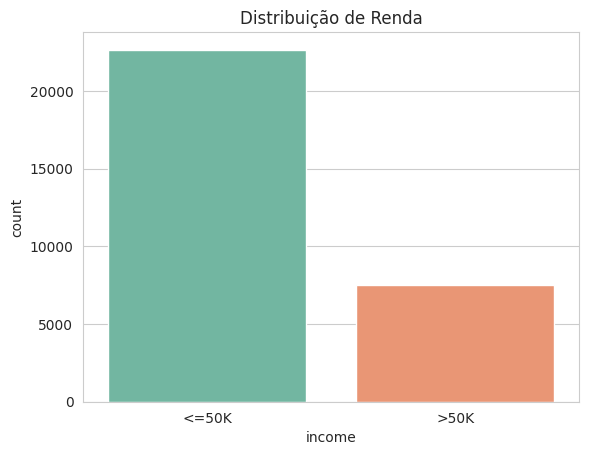

In [61]:
# Exibindo um gráfico de barras para visualizar a distribuição de renda
sns.countplot(x='income', hue='income', data=adult_data, palette='Set2', dodge=False, legend=False)
plt.title('Distribuição de Renda')
plt.show()

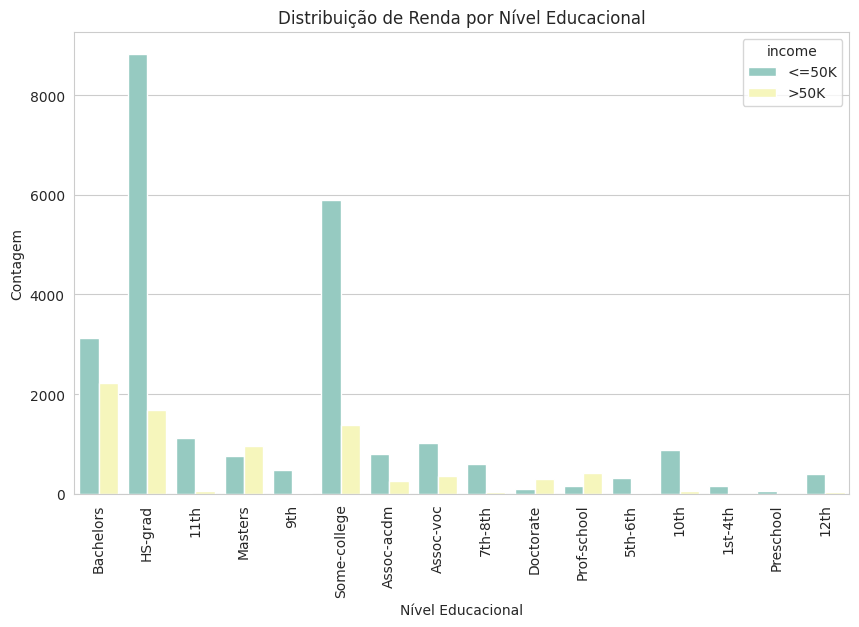

In [29]:
# Relação entre educação e renda
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=adult_data, palette='Set3')
plt.title('Distribuição de Renda por Nível Educacional')
plt.xticks(rotation=90)
plt.xlabel('Nível Educacional')
plt.ylabel('Contagem')
plt.show()

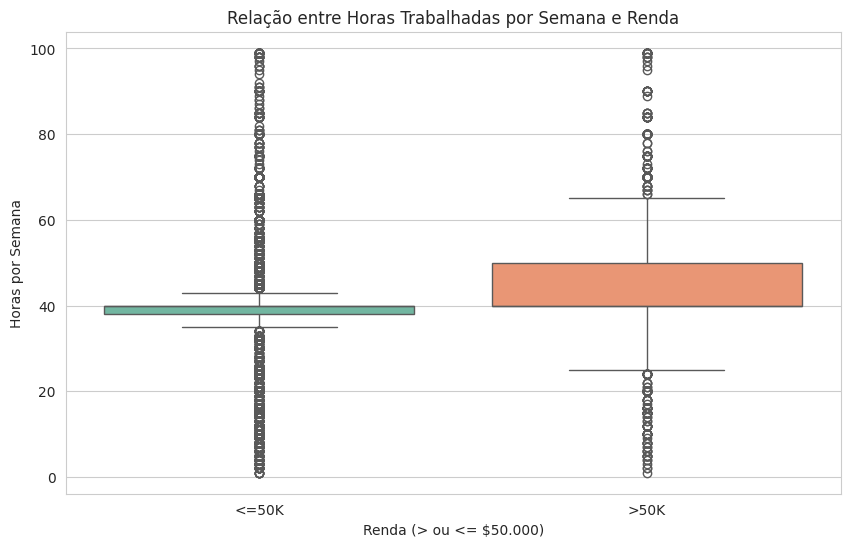

In [62]:
# Relação entre horas trabalhadas por semana e renda
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', hue='income', data=adult_data, palette='Set2', dodge=False)
plt.title('Relação entre Horas Trabalhadas por Semana e Renda')
plt.xlabel('Renda (> ou <= $50.000)')
plt.ylabel('Horas por Semana')
plt.show()


In [33]:
# Selecionando apenas as variáveis numéricas do dataset
numeric_data = adult_data.select_dtypes(include=[np.number])

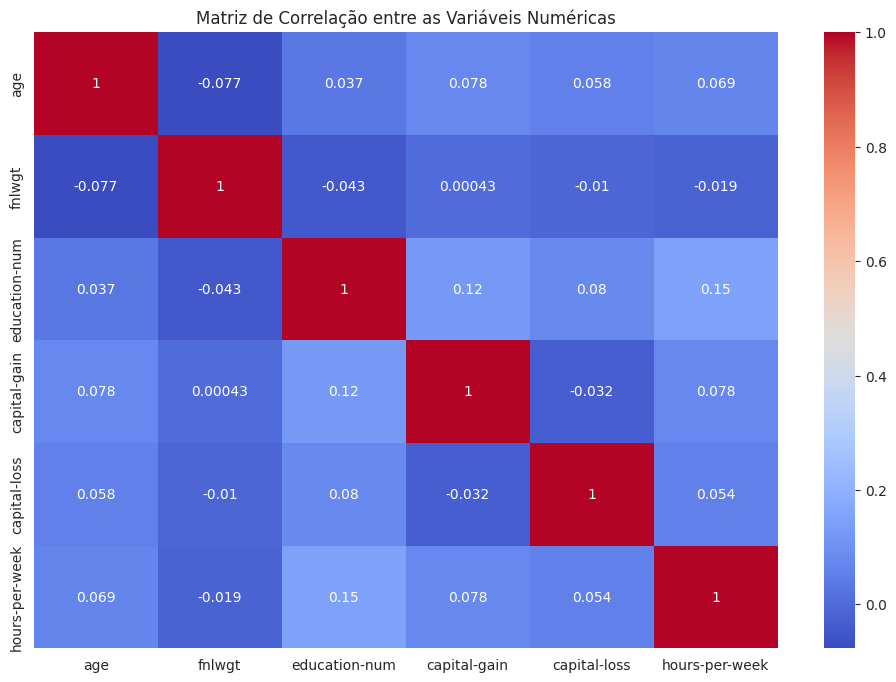

In [34]:
# Matriz de correlação para explorar relações entre variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre as Variáveis Numéricas')
plt.show()

#4. Visualização dos dados

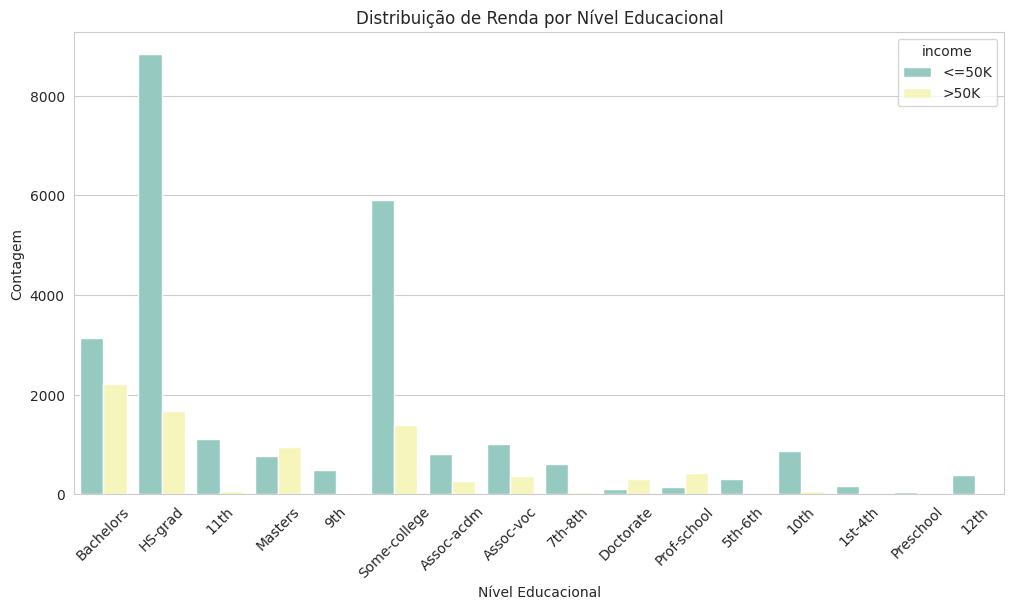

In [35]:
# Relação entre nível educacional e renda
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=adult_data, palette='Set3')
plt.title('Distribuição de Renda por Nível Educacional')
plt.xticks(rotation=45)
plt.xlabel('Nível Educacional')
plt.ylabel('Contagem')
plt.show()

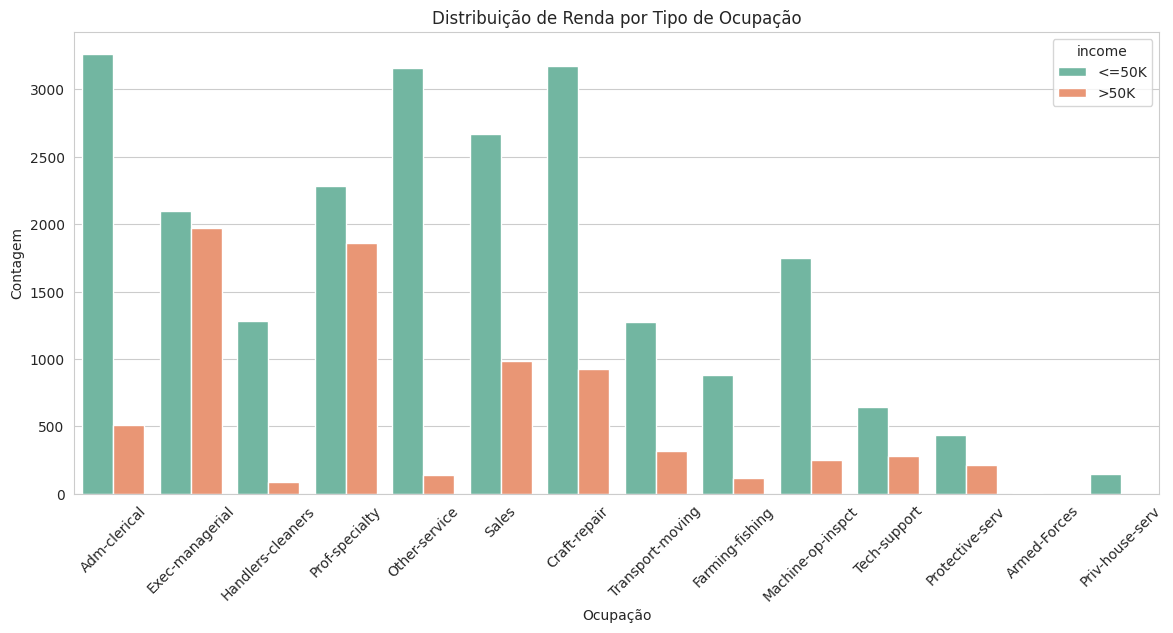

In [36]:
# Relação entre ocupação e renda
plt.figure(figsize=(14, 6))
sns.countplot(x='occupation', hue='income', data=adult_data, palette='Set2')
plt.title('Distribuição de Renda por Tipo de Ocupação')
plt.xticks(rotation=45)
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.show()

<ipython-input-37-0bcad10ee7dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=adult_data, palette='Set1')


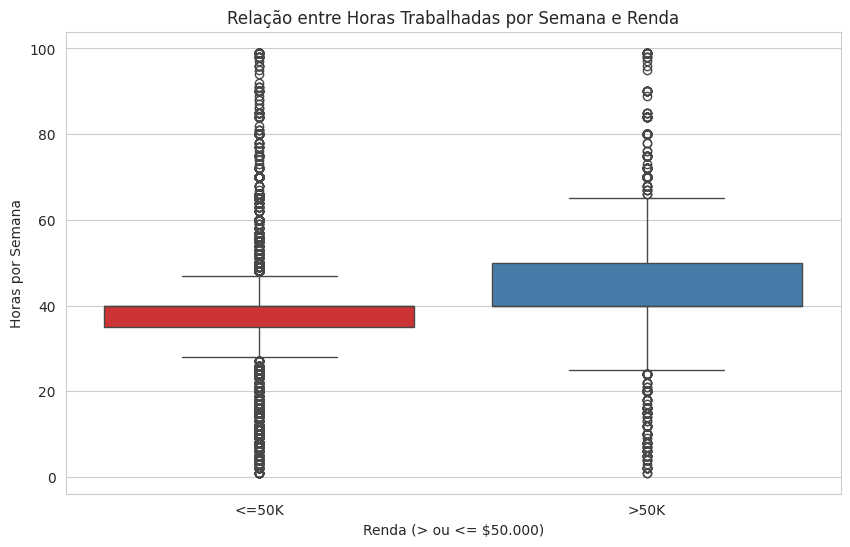

In [37]:
# Relação entre horas trabalhadas por semana e renda
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=adult_data, palette='Set1')
plt.title('Relação entre Horas Trabalhadas por Semana e Renda')
plt.xlabel('Renda (> ou <= $50.000)')
plt.ylabel('Horas por Semana')
plt.show()

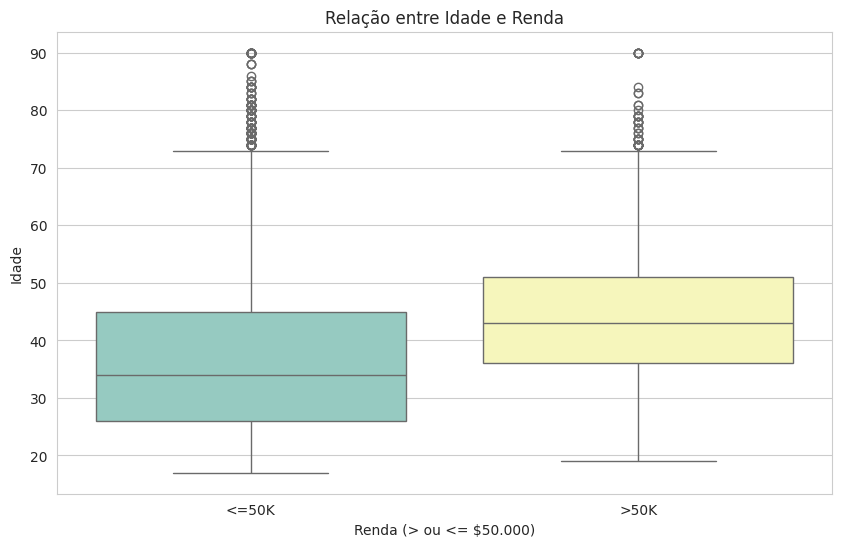

In [63]:
# Relação entre idade e renda
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', hue='income', data=adult_data, palette='Set3', dodge=False)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Renda (> ou <= $50.000)')
plt.ylabel('Idade')
plt.show()


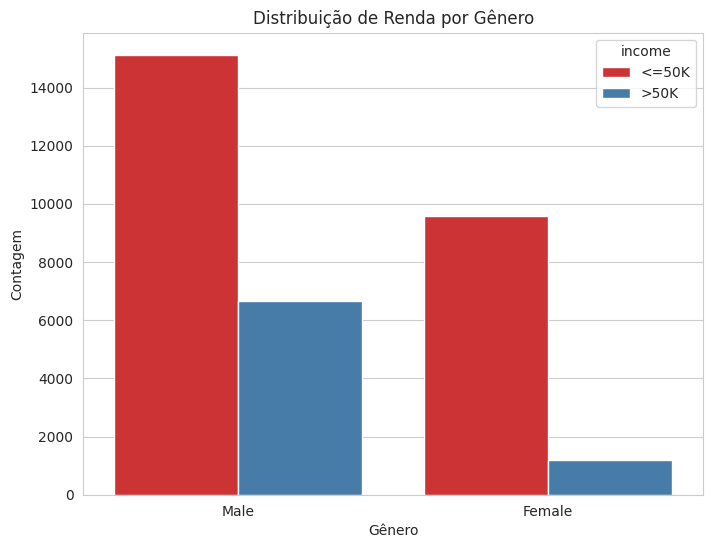

In [39]:
# Relação entre sexo e renda
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='income', data=adult_data, palette='Set1')
plt.title('Distribuição de Renda por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

#5.Pré processamento

In [40]:
# Verificando a presença de valores ausentes
adult_data.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [41]:
# Removendo as linhas com valores ausentes, se houver
adult_data = adult_data.dropna()

#5.2 Transformação das Variáveis Categóricas em Numéricas

In [42]:
# Transformação das variáveis categóricas em numéricas usando one-hot encoding
adult_data_encoded = pd.get_dummies(adult_data, drop_first=True)

In [43]:
# Exibindo os dados transformados
adult_data_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#5.3 Normalização das Variáveis Numéricas

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Selecionando as variáveis numéricas para normalização
scaler = StandardScaler()
columns_to_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

adult_data_encoded[columns_to_scale] = scaler.fit_transform(adult_data_encoded[columns_to_scale])


In [46]:
# Exibindo os dados normalizados
adult_data_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#5.4 Divisão dos Dados em Conjunto de Treinamento e Teste

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Definindo X (variáveis independentes) e y (variável alvo)
X = adult_data_encoded.drop('income_>50K', axis=1)
y = adult_data_encoded['income_>50K']

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#6. Modelagem

6.1 Árvore de Decisão

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
# Instanciando o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)

In [57]:
# Treinando o modelo
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Fazendo previsões nos dados de teste
y_pred_tree = tree_model.predict(X_test)

In [59]:
# Avaliando o modelo
print("Árvore de Decisão - Acurácia:", accuracy_score(y_test, y_pred_tree))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree))

Árvore de Decisão - Acurácia: 0.8108078240689579

Matriz de Confusão:
 [[5873  894]
 [ 818 1464]]

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.88      0.87      0.87      6767
        True       0.62      0.64      0.63      2282

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



# 7. Conclusão

##Conclusão
O **Adult Income Dataset** foi explorado visualmente e estatisticamente para entender os fatores que impactam a renda dos indivíduos. Após a transformação das variáveis categóricas em numéricas, remoção de valores ausentes e a normalização de variáveis numéricas, os dados estão prontos para serem usados em um modelo de classificação para prever se a renda de um indivíduo é superior a $50.000.